In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [2]:
from svm import *

In [3]:
# read in data
X_train, y_train = read_bank_note(test=False)
X_test, y_test = read_bank_note(test=True)

In [4]:
# plt.plot([get_gamma(t) for t in range(100)])
# plt.plot([get_gamma(t, d=0.02) for t in range(100)])
# plt.xlabel('t')
# plt.ylabel('Gamma')
# plt.show()

# Problem 2

In [47]:
C = [(100/873), (500/873), (700/873)]

## Problem 2.2a

In [59]:
params_2a=[]
error_train_2a=[]
error_test_2a=[]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=0.005, d=0.02)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2a.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2a.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2a.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2a = np.array(params_2a)
error_train_2a = np.array(error_train_2a)
error_test_2a = np.array(error_test_2a)

C = 0.115, training error: 0.0069, test error: 0.008
C = 0.573, training error: 0.0115, test error: 0.01
C = 0.802, training error: 0.0103, test error: 0.008


## Problem 2.2b

In [7]:
params_2b=[]
error_train_2b=[]
error_test_2b=[]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=1e-3, d=0.1)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2b.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2b.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2b.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2b = np.array(params_2b)
error_train_2b = np.array(error_train_2b)
error_test_2b = np.array(error_test_2b)

C = 0.115, training error: 0.0195, test error: 0.014
C = 0.573, training error: 0.008, test error: 0.008
C = 0.802, training error: 0.0264, test error: 0.03


## Problem 2c

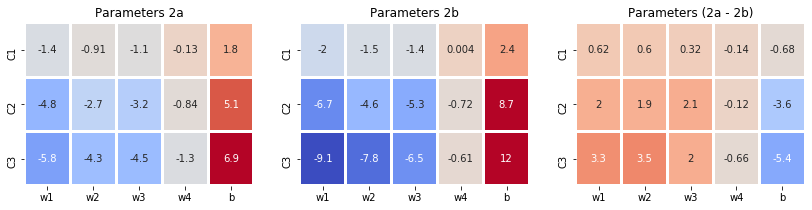

In [60]:
cmap='coolwarm'
vmin = min(params_2a.min(), params_2b.min())
vmax = min(params_2a.max(), params_2b.max())
x_lab = ['w1', 'w2', 'w3', 'w4', 'b']
y_lab = ['C1', 'C2', 'C3']
params_ab = params_2a - params_2b

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_ab, ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters (2a - 2b)')

plt.savefig('./figures/p_2c_hm.png', dpi=300)
plt.show()

In [9]:
# lim = max(abs(vmin), abs(vmax)) * 1.2
# plt.figure(figsize=(4.5, 4.5))
# plt.scatter(params_2a.reshape(-1), params_2b.reshape(-1), label='Observations')
# plt.plot([-lim, lim], [-lim, lim], '--r', label='Reference Line')
# plt.grid(alpha=0.3)
# plt.xlim(-lim, lim)
# plt.ylim(-lim, lim)
# plt.xlabel('Params 2a')
# plt.ylabel('Params 2b')
# plt.legend()
# plt.show()

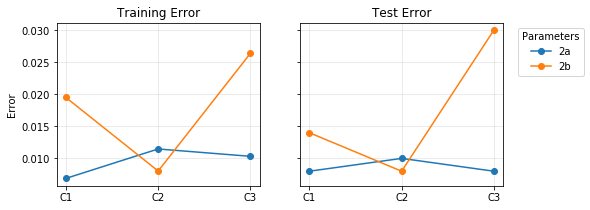

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 3))
x_val = ['C1', 'C2', 'C3']

ax[0].plot(x_val, error_train_2a, '-o', label='2a')
ax[0].plot(x_val, error_train_2b, '-o', label='2b')

ax[1].plot(x_val, error_test_2a, '-o', label='2a')
ax[1].plot(x_val, error_test_2b, '-o', label='2b')

ax[0].set_ylabel('Error')

for i, title in enumerate(['Training', 'Test']):
    ax[i].grid(alpha=0.3)
    ax[i].set_title(f"{title} Error")
    
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./figures/p_2c_error.png', dpi=300, bbox_inches='tight')
plt.show()

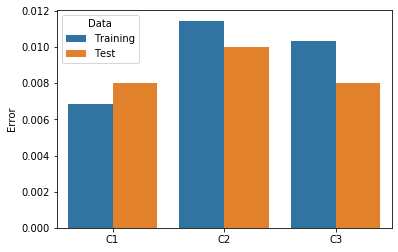

In [81]:
df_plt_trn = pd.DataFrame({'x': x_val, 'Error': error_train_2a})
df_plt_tst = pd.DataFrame({'x': x_val, 'Error': error_test_2a})
df_plt_trn['Data'] = 'Training'
df_plt_tst['Data'] = 'Test'
df_plt = pd.concat([df_plt_trn, df_plt_tst], axis=0)

sns.barplot(data=df_plt, x='x', y='Error', hue='Data')
plt.xlabel('')
# plt.savefig('./figures/p_2a_error.png', dpi=300)
plt.show()

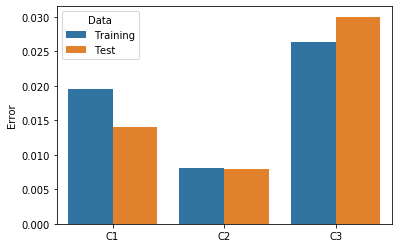

In [82]:
df_plt_trn = pd.DataFrame({'x': x_val, 'Error': error_train_2b})
df_plt_tst = pd.DataFrame({'x': x_val, 'Error': error_test_2b})
df_plt_trn['Data'] = 'Training'
df_plt_tst['Data'] = 'Test'
df_plt = pd.concat([df_plt_trn, df_plt_tst], axis=0)

sns.barplot(data=df_plt, x='x', y='Error', hue='Data')
plt.xlabel('')
# plt.savefig('./figures/p_2b_error.png', dpi=300)
plt.show()

In [75]:
df_plt_trn = pd.DataFrame({'x': x_val, 'Train': error_train_2a, 'Test': error_test_2a})
# sns.barplot(data=df_plt)

,variable,value
0,x,C1
1,x,C2
2,x,C3
3,Train,0.00688073
4,Train,0.0114679
5,Train,0.0103211
6,Test,0.008
7,Test,0.01
8,Test,0.008


# Problem 3

## Problem 3a

In [11]:
params_3a=[]
error_train_3a=[]
error_test_3a=[]

for Ci in C:
    # instantiate model
    model = SVM_Dual(C=Ci)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_3a.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_3a.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_3a.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_3a = np.array(params_3a)
error_train_3a = np.array(error_train_3a)
error_test_3a = np.array(error_test_3a)

Optimization Converged: True
Optimization terminated successfully.
C = 0.115, training error: 0.0115, test error: 0.012
Optimization Converged: True
Optimization terminated successfully.
C = 0.573, training error: 0.008, test error: 0.008
Optimization Converged: True
Optimization terminated successfully.
C = 0.802, training error: 0.0092, test error: 0.01


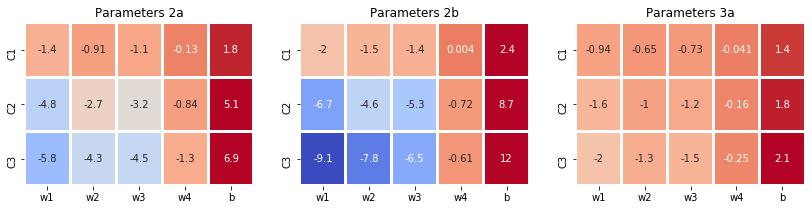

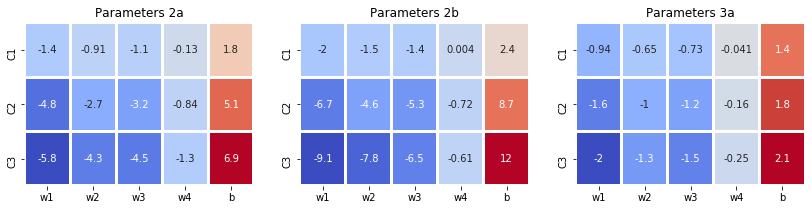

In [63]:
cmap='coolwarm'
vmin = min(params_2a.min(), params_2b.min(), params_3a.min())
vmax = min(params_2a.max(), params_2b.max(), params_3a.max())
x_lab = ['w1', 'w2', 'w3', 'w4', 'b']
y_lab = ['C1', 'C2', 'C3']
# params_ab = params_2a - params_2b

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_3a, ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters 3a')
plt.savefig('./figures/p_3a_hm1.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_3a, ax=ax[2], cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters 3a')

plt.savefig('./figures/p_3a_hm2.png', dpi=300)
plt.show()

In [13]:
# # store parameters
# pd.DataFrame(params_2a).to_csv('3params_2a.csv', index=False)
# pd.DataFrame(params_2b).to_csv('3params_2b.csv', index=False)
# pd.DataFrame(params_3a).to_csv('3params_3a.csv', index=False)

In [14]:
gamma_values = [0.1, 0.5, 1, 5, 100]
C_values = [(100/873), (500/873), (700/873)]

r_model=[]
r_error_train=[]
r_error_test=[]
r_gamma=[]
r_C=[]
r_num_support_vectors=[]

for g in gamma_values:
    for C in C_values:
        
        model = SVM_Dual(C=C, kernel='gaussian')
        model.fit(X_train, y_train, gamma=g)
        
        y_pred = model.predict(X_train)
        train_error = get_error(y_pred, y_train)
        
        y_pred = model.predict(X_test)
        test_error = get_error(y_pred, y_test)
        
        n_support = np.sum(model.alpha > 0)
        
        r_model.append(model)
        r_error_train.append(train_error)
        r_error_test.append(test_error)
        r_gamma.append(g)
        r_C.append(C)
        r_num_support_vectors.append(n_support)
        
        print(f"Gamma: {g}, C: {C}, Train Error: {train_error}, Test Error: {test_error}, Support: {n_support}")

Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.1, C: 0.1145475372279496, Train Error: 0.4461009174311927, Test Error: 0.442, Support: 869
Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.1, C: 0.572737686139748, Train Error: 0.0, Test Error: 0.212, Support: 869
Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.1, C: 0.8018327605956472, Train Error: 0.0, Test Error: 0.182, Support: 868
Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.5, C: 0.1145475372279496, Train Error: 0.1536697247706422, Test Error: 0.268, Support: 825
Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.5, C: 0.572737686139748, Train Error: 0.0, Test Error: 0.014, Support: 731
Optimization Converged: True
Optimization terminated successfully.
Gamma: 0.5, C: 0.8018327605956472, Train Error: 0.0, Test Error: 0.01, Support: 694
Optimization Converged: True
Optimization terminated successf

In [20]:
df_results = pd.DataFrame({'Gamma': r_gamma,
                          'C': r_C,
                          'TrainError': r_error_train,
                          'TestError': r_error_test,
                          'NumSV': r_num_support_vectors})
print(df_results)
# df_results.to_csv('p3b.csv', index=False)

In [41]:
df_results

,Gamma,C,TrainError,TestError,NumSV
0,0.1,0.114548,0.446101,0.442,869
1,0.1,0.572738,0.000000,0.212,869
2,0.1,0.801833,0.000000,0.182,868
3,0.5,0.114548,0.153670,0.268,825
4,0.5,0.572738,0.000000,0.014,731
5,0.5,0.801833,0.000000,0.010,694
6,1.0,0.114548,0.000000,0.022,805
7,1.0,0.572738,0.000000,0.004,556
8,1.0,0.801833,0.000000,0.004,528
9,5.0,0.114548,0.003440,0.004,442


In [45]:
c5_1 = r_model[1].alpha > 0
c5_2 = r_model[4].alpha > 0
c5_3 = r_model[7].alpha > 0
c5_4 = r_model[10].alpha > 0
c5_5 = r_model[13].alpha > 0

print(f"Gamma overlap 0.1 to 0.5: {np.sum(c5_1 & c5_2)}")
print(f"Gamma overlap 0.5 to 1: {np.sum(c5_2 & c5_3)}")
print(f"Gamma overlap 1 to 5: {np.sum(c5_3 & c5_4)}")
print(f"Gamma overlap 5 to 100: {np.sum(c5_4 & c5_5)}")

Gamma overlap 0.1 to 0.5: 731
Gamma overlap 0.5 to 1: 554
Gamma overlap 1 to 5: 198
Gamma overlap 5 to 100: 73
